# Лабораторная работа: ИЗУЧЕНИЕ ДИФРАКЦИИ СВЕТА

## Установка
Выполните чтобы установить зависимости

In [1]:
!pip install numpy scipy matplotlib appdirs diffractio hickle pandas pillow

## Импорт зависимостей

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY

number of processors: 4
screeninfo not imported.
cv2 not imported. Function send_image_screen cannot be used


In [3]:
# Регулируем размер изображения
from matplotlib import rcParams
rcParams['figure.figsize']=[10,10]
rcParams['font.size'] = 18

## Использование модуля diffractio

### Создание источника света

In [6]:
length = 10 * mm
num_data = 1024
wavelength = 532*nm
x0 = np.linspace(-length / 2, length / 2, num_data)
y0 = np.linspace(-length / 2, length / 2, num_data)

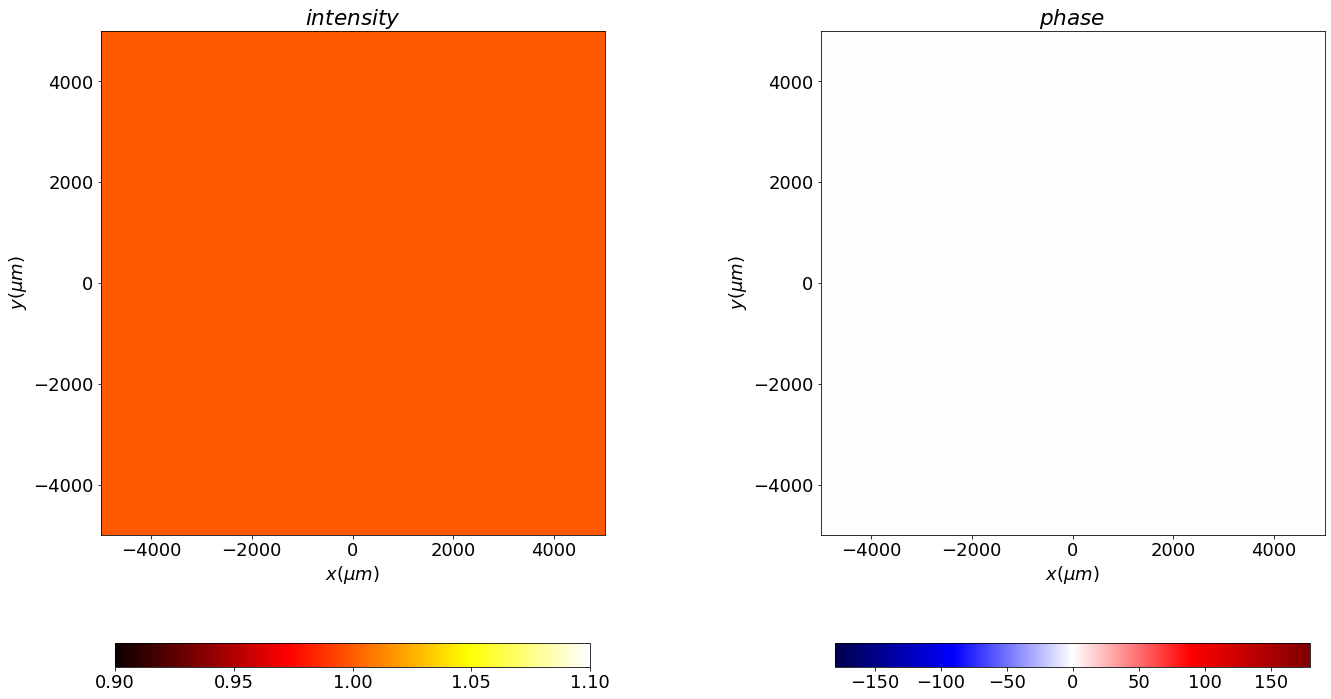

In [7]:
light_source = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)

# Плоская волна заполняющая весь экран
light_source.plane_wave(
    A=1,
    z0=0,
    phi=0 * degrees,
    theta=0 * degrees)

light_source.draw(kind='field');

### Интерференция двух источников

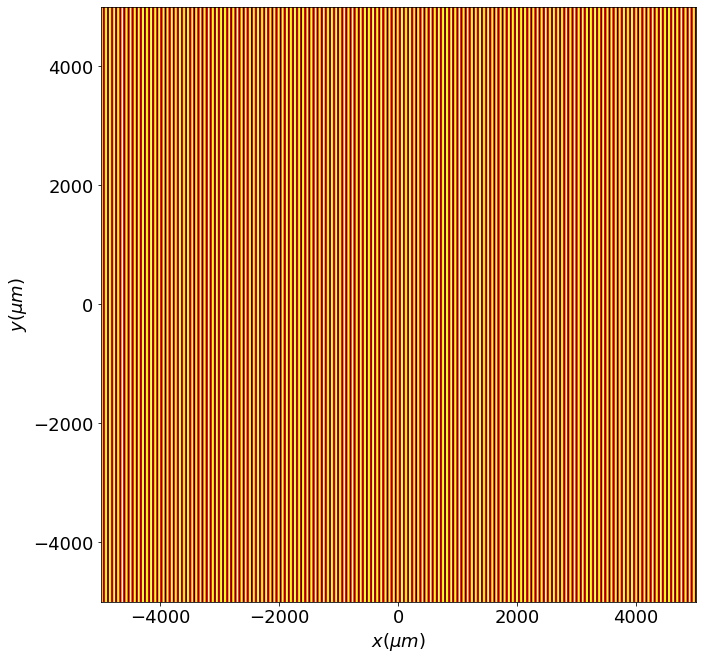

In [8]:
u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength, info='u1')
u2 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength, info='u2')

u1.plane_wave(A=1, theta=-1*degrees, phi=90*degrees)
u2.plane_wave(A=1, theta=+1*degrees, phi=90*degrees)

u_sum=u1+u2
u_sum.draw(kind='intensity');

### Создание щели

In [9]:
slit = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
slit.square(r0= (0*um, 0*um), size = (500*um, 10*mm), angle = 0)

### Взаимодействие щели с источником

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f5a9d6520d0>)

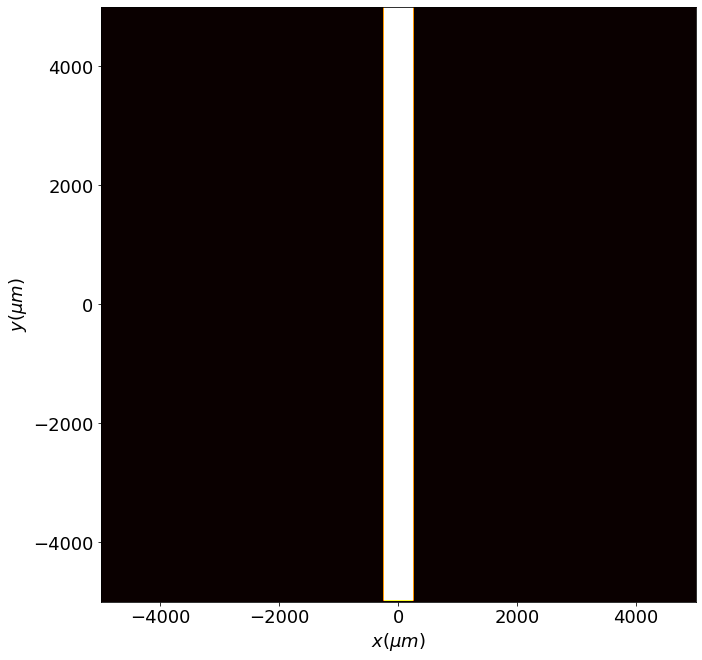

In [10]:
temp = light_source * slit
temp.draw(kind='intensity')

### Распространение волны

#### Интеграл Релея-Зоммерфельда

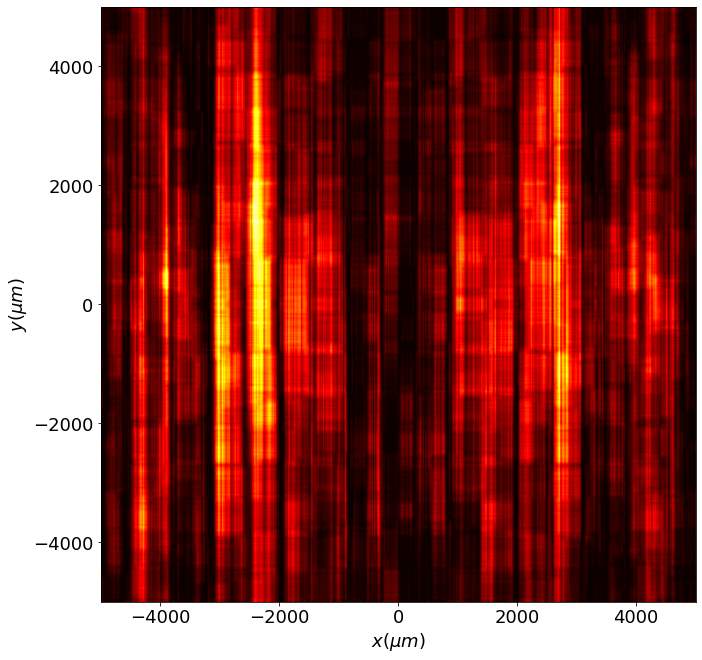

In [11]:
temp_rs = temp.RS(z=10*mm, new_field=True)
temp_rs.draw(kind='intensity');

#### Преобразование фурье

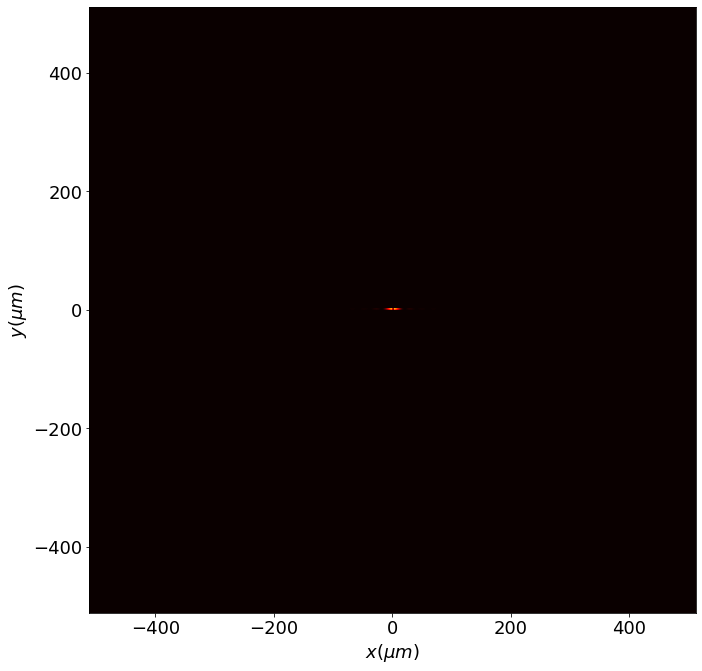

In [12]:
temp_fft = temp.fft(new_field=True, shift=True)
temp_fft.draw(kind='intensity');

### Увеличение изображения

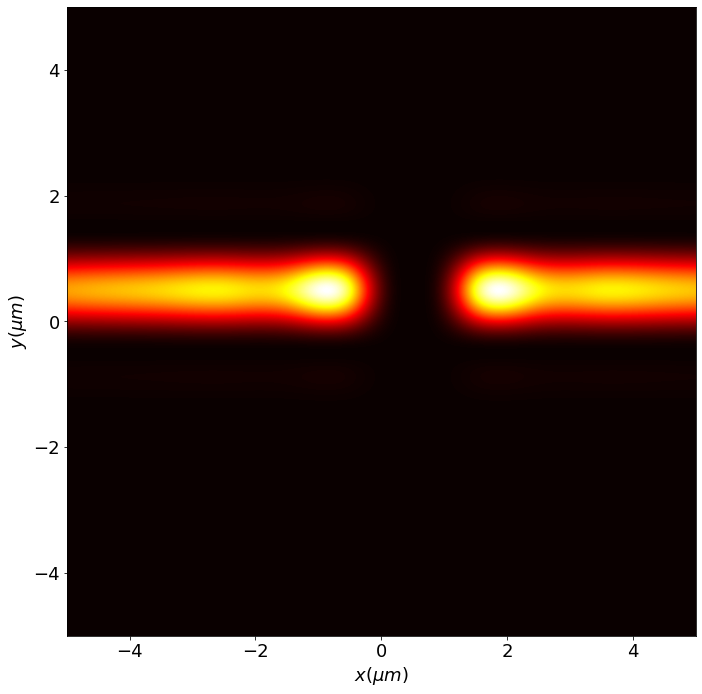

In [18]:
temp_fft.cut_resample(
    x_limits=(-5 * um, 5 * um),
    y_limits=(-5 * um, 5 * um),
    num_points=(512, 512),
    new_field=False)
temp_fft.draw(kind='intensity');

### Другие элементы

#### Линза

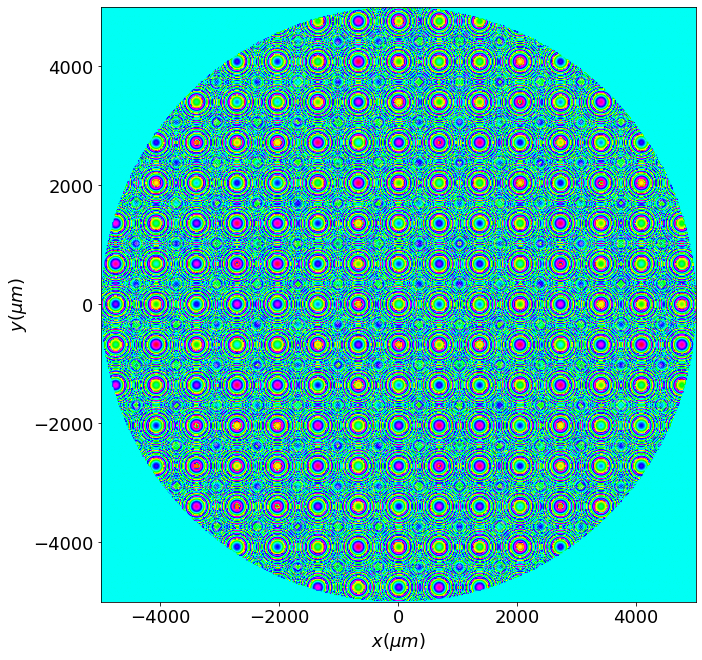

In [24]:
t0 = Scalar_mask_XY(x0, y0, wavelength)
t0.lens(
    r0=(0 * um, 0 * um),
    radius=(5 * mm, 5 * mm),
    focal=(25 * mm, 25 * mm),
    angle=0 * degrees)
t0.draw(kind='phase');

#### Двойная щель

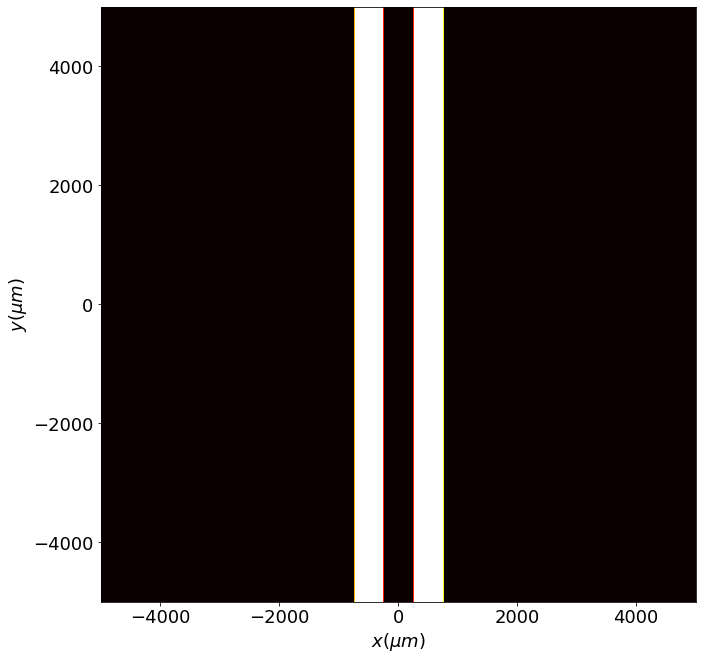

In [22]:
t1 = Scalar_mask_XY(x0, y0, wavelength)
t1.double_slit(
    x0=0, size=500 * um, separation=1000 * um, angle=0 * degrees)
t1.draw(kind='intensity');


## Часть A: Дифракция Френеля

* Проведите измерения числа темных полос от растояния до щели
* Измереть интенсивность полос сбоку от щели и сравните результаты со спиралью Корню
* Замените щель на тонкую проволоку (используйте двойную шель с большим размером отверстий)

In [7]:
# Создаем источник
length = 1 * mm
num_data = 1024
wavelength = 532*nm
x0 = np.linspace(-length / 2, length / 2, num_data)
y0 = np.linspace(-length / 2, length / 2, num_data)

light_source = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)

# Плоская волна заполняющая весь экран
light_source.plane_wave(
    A=1,
    z0=0,
    phi=0 * degrees,
    theta=0 * degrees)

In [8]:
# Создаем щель
slit1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
slit1.square(r0= (0*um, 0*um), size = (300*um, 1*mm), angle = 0)
temp = light_source * slit1

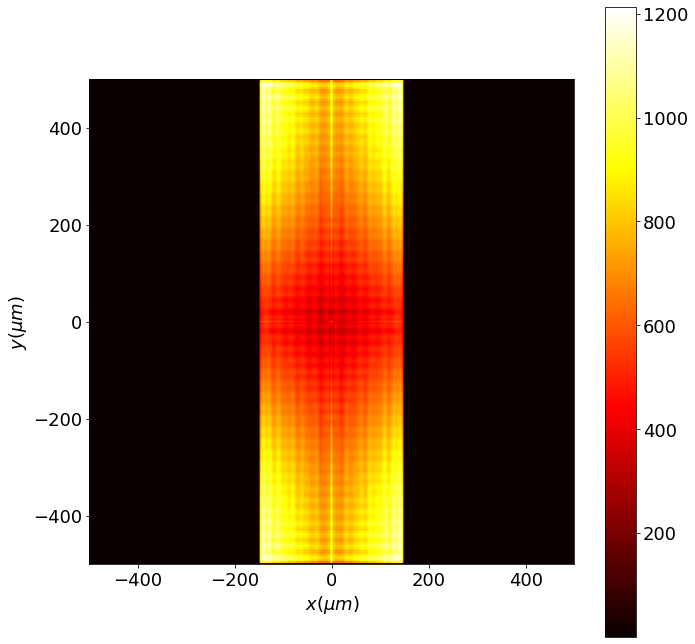

In [9]:
# Расчитываем поле на растоянии а от щели
a = 0.1*um
temp_rs = temp.RS(z=a, new_field=True)
temp_rs.cut_resample(
    x_limits=(-500 * um, 500 * um),
    y_limits=(-500 * um, 500 * um),
    num_points=(512, 512),
    new_field=False)
temp_rs.draw(kind='intensity')
plt.colorbar()

## Часть Б: Дифракция Фраунгофера на щели

* Измерьте с помощью винта поперечного перемещения микроскопа координаты нескольких дифракционных минимумов (от −m до +m). Определите ширину щели.
* Убедитесь, что смещение щели в боковом направлении не приводит к сдвигу дифракционной картины.
* Проследите, как изменяется масштаб дифракционной картины при уменьшении ширины щели

In [37]:
# Создаем источник
length = 5 * mm
num_data = 1024
wavelength = 532*nm
x0 = np.linspace(-length / 2, length / 2, num_data)
y0 = np.linspace(-length / 2, length / 2, num_data)

light_source = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)

# Плоская волна заполняющая весь экран
light_source.plane_wave(
    A=1,
    z0=0,
    phi=0 * degrees,
    theta=0 * degrees)

In [38]:
# Создаем щель
slit1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
slit1.square(r0= (0*um, 0*um), size = (300*um, 1*mm), angle = 0)
temp = light_source * slit1

In [39]:
# Создаем линзу
lens = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
lens.lens(
    r0=(0 * um, 0 * um),
    radius=(0.5 * mm, 0.5 * mm),
    focal=(25 * mm, 25 * mm),
    angle=0 * degrees)

temp_rs = temp.RS(z=50*mm, new_field=True)
temp_lens = temp_rs*lens

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f5a9ad71950>)

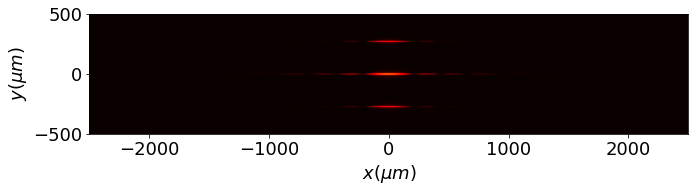

In [42]:
# Расчитываем поле на растоянии а от щели

temp_fr = temp_lens.RS(z=25*mm, new_field=True)
temp_fr.cut_resample(
    x_limits=(-5000 * um, 5000 * um),
    y_limits=(-500 * um, 500 * um),
    num_points=(512, 512),
    new_field=False)
temp_fr.draw(kind='intensity', logarithm=True)
# plt.colorbar()

## Часть В: Дифракция Фраунгофера на двух щелях

* Определите координаты самых удалённых друг от друга тёмных полос внутри центрального максимума и просчитайте число светлых промежутков между ними. Измерьте ширину центрального максимума.
* Исследуйте влияние пространственной когерентности на видность интерференционной картины. Для этого, расширяя входную щель , подберите такую ширину щели, при которой наступает первое исчезновение интерференционных полос, и запишите эту величину. Убедитесь, что при дальнейшем увеличении входной щели картина вновь появляется, но она заметно менее контрастна. Определите соответствующую ширину входной щели и ширину, при которой картина наиболее контрастна.

In [62]:
# Создаем источник
length = 5 * mm
num_data = 1024
wavelength = 532*nm
x0 = np.linspace(-length / 2, length / 2, num_data)
y0 = np.linspace(-length / 2, length / 2, num_data)

light_source = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)

# Плоская волна заполняющая весь экран
light_source.plane_wave(
    A=1,
    z0=0,
    phi=0 * degrees,
    theta=0 * degrees)

In [63]:
# Одинарная щель
slit = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
slit.square(r0= (0*um, 0*um), size = (100*um, 1*mm), angle = 0)
temp_slit = light_source * slit

In [64]:
# Первая линза
lens = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
lens.lens(
    r0=(0 * um, 0 * um),
    radius=(0.5 * mm, 0.5 * mm),
    focal=(50 * mm, 50 * mm),
    angle=0 * degrees)
temp_lens_1 =  temp_slit.RS(z=50*mm, new_field=True)*lens

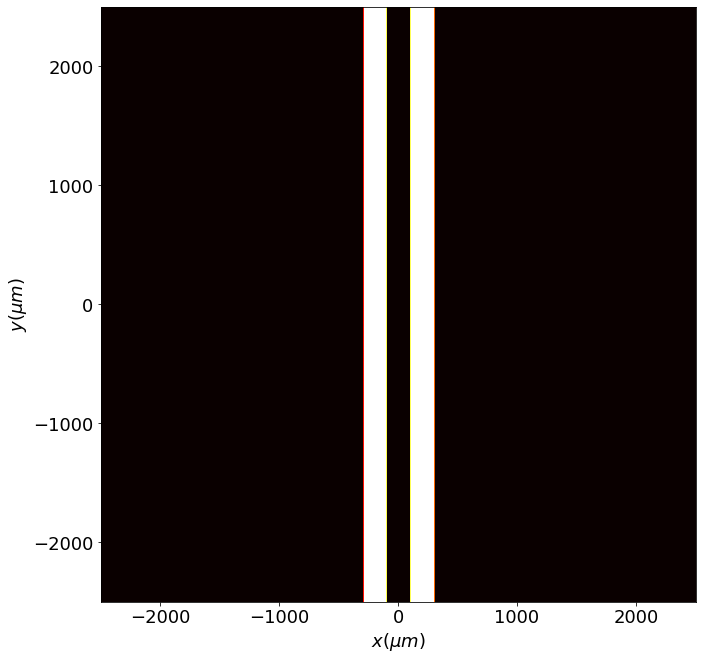

In [65]:
# Двойная щель
double_slit = Scalar_mask_XY(x0, y0, wavelength)
double_slit.double_slit(
    x0=0, size=200 * um, separation=400 * um, angle=0 * degrees)
double_slit.draw(kind='intensity');
temp = temp_lens_1.RS(z=30*mm, new_field=True) * double_slit

In [66]:
lens = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
lens.lens(
    r0=(0 * um, 0 * um),
    radius=(0.5 * mm, 0.5 * mm),
    focal=(25 * mm, 25 * mm),
    angle=0 * degrees)

temp_rs = temp.RS(z=50*mm, new_field=True)
temp_lens = temp_rs*lens

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7eff73a96910>)

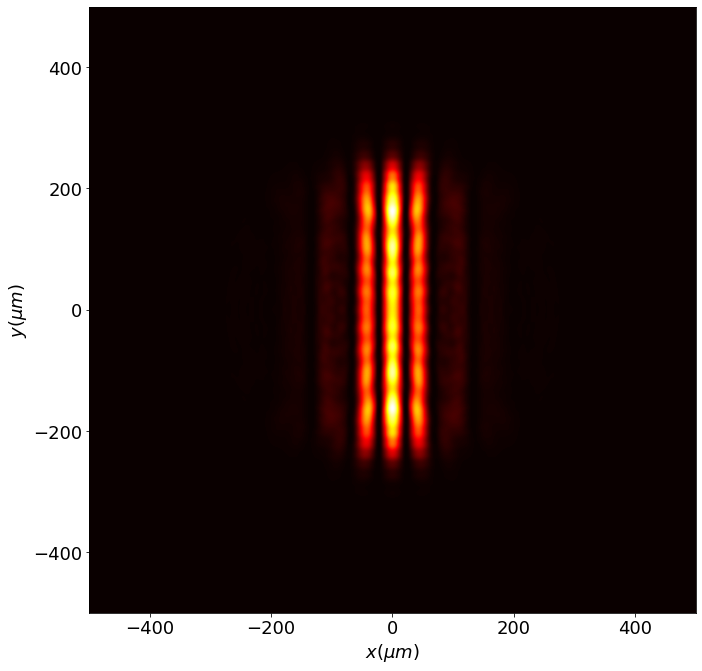

In [67]:
temp_fr = temp_lens.RS(z=25*mm, new_field=True)
temp_fr.cut_resample(
    x_limits=(-500 * um, 500 * um),
    y_limits=(-500 * um, 500 * um),
    num_points=(512, 512),
    new_field=False)
temp_fr.draw(kind='intensity', logarithm=True)

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7eff73a5f610>)

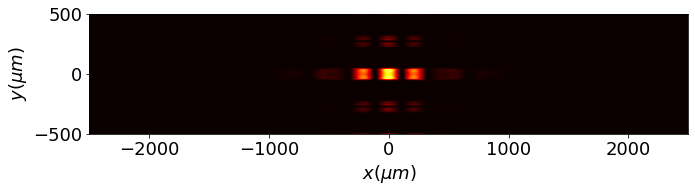

In [68]:
temp_fr = temp_lens.RS(z=25*mm, new_field=True)
temp_fr.cut_resample(
    x_limits=(-5000 * um, 5000 * um),
    y_limits=(-500 * um, 500 * um),
    num_points=(512, 512),
    new_field=False)
temp_fr.draw(kind='intensity', logarithm=True)

## Часть Г:  Влияние дифракции на разрешающую способность оптического инструмента

* Получите в поле зрения чёткое, симметричное изображение двойного источника
* Поставьте между линзами щель и, уменьшая её ширину, наблюдайте за ухудшением качества изображения. Подберите ширину щели так, чтобы изображения обеих щелей почти сливались, но всё-таки ещё воспринимались раздельно. Запишите ширину щели.

In [16]:
# Создаем источник
length = 5 * mm
num_data = 1024
wavelength = 532*nm
x0 = np.linspace(-length / 2, length / 2, num_data)
y0 = np.linspace(-length / 2, length / 2, num_data)

light_source = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)

# Плоская волна заполняющая весь экран
light_source.plane_wave(
    A=1,
    z0=0,
    phi=0 * degrees,
    theta=0 * degrees)

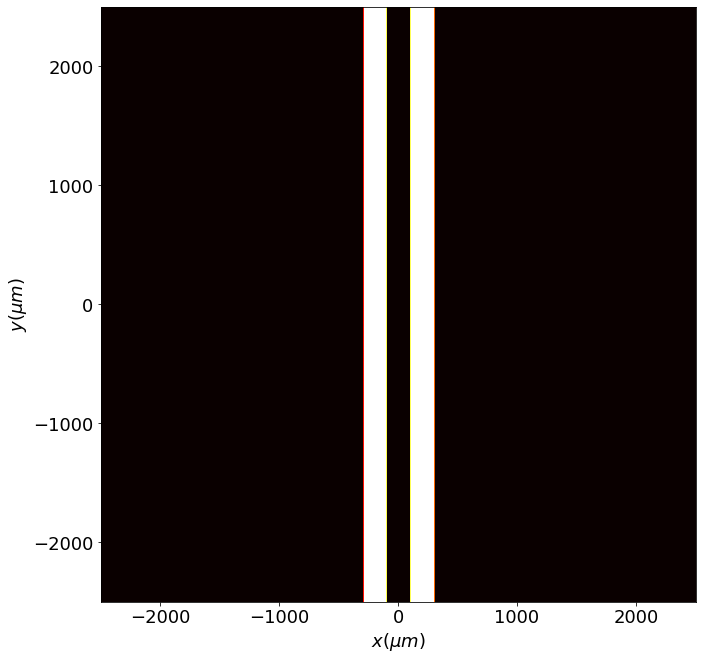

In [47]:
# Двойная щель
double_slit = Scalar_mask_XY(x0, y0, wavelength)
double_slit.double_slit(
    x0=0, size=200 * um, separation=400 * um, angle=0 * degrees)
double_slit.draw(kind='intensity');
temp = light_source * double_slit

In [53]:
# Первая линза
lens = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
lens.lens(
    r0=(0 * um, 0 * um),
    radius=(0.5 * mm, 0.5 * mm),
    focal=(50 * mm, 50 * mm),
    angle=0 * degrees)
temp_lens_1 =  temp.RS(z=50*mm, new_field=True)*lens

In [58]:
# Одинарная щель
slit = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
slit.square(r0= (0*um, 0*um), size = (100*um, 1*mm), angle = 0)
temp_slit = temp_lens_1.RS(z=30*mm, new_field=True) * slit
# Рaскоментируйте эту строку (и закоментируйте верхную) чтобы убрать щель
# temp_slit = temp_lens_1.RS(z=30*mm, new_field=True)

In [59]:
# Вторая линза
lens = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
lens.lens(
    r0=(0 * um, 0 * um),
    radius=(0.5 * mm, 0.5 * mm),
    focal=(25 * mm, 25 * mm),
    angle=0 * degrees)
temp_lens_2 =  temp_slit.RS(z=30*mm, new_field=True)*lens

In [60]:
result = temp_lens_2.RS(z=25*mm, new_field=True)

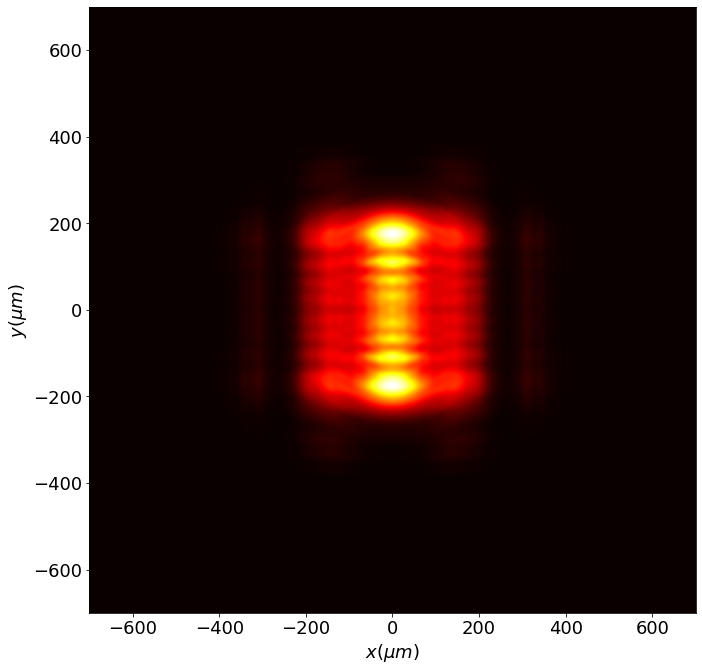

In [61]:
result_1 = result.cut_resample(
    x_limits=(-700 * um, 700 * um),
    y_limits=(-700 * um, 700 * um),
    num_points=(512, 512),
    new_field=True)
result_1.draw(kind='intensity');